In [76]:
import pandas as pd

In [77]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [78]:
# Conferindo os dados
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [79]:
# Conferindo a coluna Tipo
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [80]:
# Numero de quartos por imovel
dados[['Tipo', 'Quartos']]

,Tipo,Quartos
0,Quitinete,1
1,Casa,2
2,Conjunto Comercial/Sala,0
3,Apartamento,1
4,Apartamento,1
...,...,...
32955,Quitinete,0
32956,Apartamento,3
32957,Apartamento,2
32958,Apartamento,2


In [81]:
# Media de quartos por imovel geral
dados['Quartos'].mean()

1.7713895631067962

In [82]:
# Media de quartos por imovel separadamente
dados.groupby('Tipo')[['Quartos']].mean()

,Quartos
Tipo,
Apartamento,2.481569
Box/Garagem,0.060976
Casa,3.133402
Casa Comercial,1.562264
Casa de Condomínio,4.007028
Casa de Vila,1.927711
Chácara,3.000000
Conjunto Comercial/Sala,0.040939
Flat,1.415966


In [83]:
# Para ordernar os dados de forma decrescente
dados_apartamentos = dados.groupby('Tipo')[['Quartos']].mean().sort_values('Quartos')
dados_apartamentos

,Quartos
Tipo,
Loteamento/Condomínio,0.000000
Indústria,0.000000
Loja/Salão,0.010519
Conjunto Comercial/Sala,0.040939
Terreno Padrão,0.042857
Galpão/Depósito/Armazém,0.043339
Loja Shopping/ Ct Comercial,0.044534
Box/Garagem,0.060976
Prédio Inteiro,0.335548


In [84]:
# Selecionando apenas os imoveis do tipo apartamento
dados_apartamentos.query('Tipo == "Apartamento"')

,Quartos
Tipo,
Apartamento,2.481569


**Conferindo quantos bairros unicos existem na base de dados**

In [85]:
# Verificando a quantidade de bairros unicos existem no banco de dados
len(dados['Bairro'].unique())

162

In [86]:
# Segunda forma de verificar
dados['Bairro'].nunique()

162

In [87]:
qtd_bairros = dados.Bairro.value_counts().to_frame()
qtd_bairros

,count
Bairro,
Barra da Tijuca,6259
Centro,3258
Copacabana,3186
Ipanema,2233
Recreio dos Bandeirantes,2127
...,...
Cachamorra,1
Vasco da Gama,1
Cidade de Deus,1


In [90]:
# Selecionando os 5 valores mais altos
valores_altos = dados.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head(5)
valores_altos

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308


<Axes: ylabel='Bairro'>

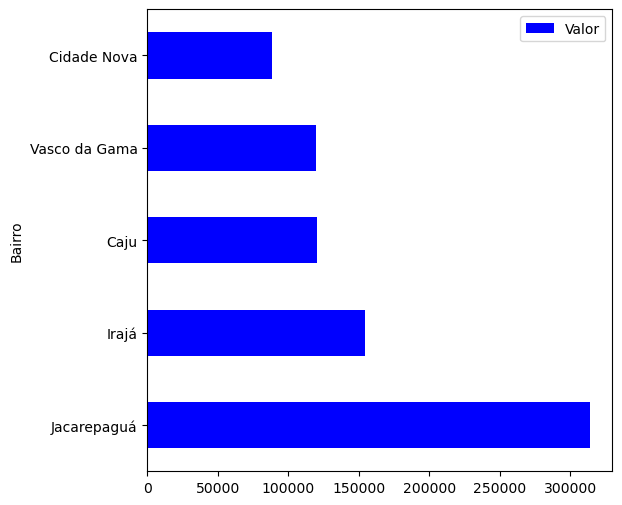

In [91]:
# Grafico dos 5 valores mais altos
valores_altos.plot(kind='barh', figsize=(6, 6), color='blue')